In [3]:
import pandas as pd
import numpy as np
file_path = '/Users/z/Desktop/Mathor/数据.xlsx'
df = pd.read_excel(file_path)
# 过滤不符合条件的经纬度数据
df = df[(df['经度'] >= 95 ) & (df['经度'] <= 180) & (df['纬度'] >= 2) & (df['纬度'] <= 58)]
df = df[(df['气压'] > 100 ) & (df['风速'] <= 100)]
import pandas as pd

def convert_direction(direction):
    # 如果移动方向为空，直接返回空
    if pd.isnull(direction):
        return direction
    
    # 创建字符到数值的映射
    char_mapping = {
        '东': '1',
        '南': '2',
        '西': '3',
        '北': '4',
        '偏': '0',  
        'E': '1',
        'S': '2',
        'W': '3',
        'N': '4',
    }
    
    # 初始化转换结果
    converted = ''
    
    # 逐个字符转换，忽略“偏”字
    for char in direction:
        if char in char_mapping:
            converted += char_mapping[char]
    
    # 返回转换后的结果
    return converted

# 应用转换函数
df['移动方向数值'] = df['移动方向'].apply(convert_direction)

# 如果需要将新列放到原列后面
current_direction_index = df.columns.get_loc('移动方向')
df.insert(current_direction_index + 1, '移动方向数值', df.pop('移动方向数值'))

# 假设你要转换的列名为 '台风起始时间', '台风结束时间', '当前台风时间'
df['台风起始时间'] = pd.to_datetime(df['台风起始时间'])
df['台风结束时间'] = pd.to_datetime(df['台风结束时间'])
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
# 提取年份
df['年份'] = df['当前台风时间'].dt.year
df['月份'] = df['当前台风时间'].dt.month
# 定义一个函数将经纬度转换为以.5结尾的值
def convert_to_half(value):
    if value % 1 < 0.25:  # 小于 x.25
        return np.floor(value) + 0.5
    elif value % 1 < 0.75:  # 在 x.25 和 x.75 之间
        return np.floor(value) + 0.5
    else:  # 大于等于 x.75
        return np.ceil(value) - 0.5

# 应用函数转换经纬度
df['调整后的经度'] = df['经度'].apply(convert_to_half)
df['调整后的纬度'] = df['纬度'].apply(convert_to_half)

# 根据年份分类
grouped = df.groupby('年份')[['调整后的经度', '调整后的纬度']].apply(lambda x: x.reset_index(drop=True))
# 替换台风强度中的“超强台风（Super TY）”为“超强台风（SuperTY）”
df['台风强度'] = df['台风强度'].replace('超强台风(Super TY)', '超强台风(SuperTY)')

# 剔除年份为1945的行
df = df[df['年份'] != 1945]
# 计算气压值不为0的平均值
pressure_mean = df.loc[df['气压'] != 0, '气压'].mean()
# 使用 loc 来进行替换，以避免警告
df.loc[df['气压'] == 0, '气压'] = pressure_mean
import pandas as pd

# 假设 df 是你的 DataFrame，且风速列名为 '风速'
# 定义风速的区间和对应的台风强度类别
bins = [-1, 10.8, 17.1, 24.4, 32.6, 41.4, 50.9, float('inf')]
labels = ['弱热带低压或未知', '热带低压（TD）', '热带风暴（TS）', '强热带风暴（STS）', '台风（TY）', '强台风（STY）', '超强台风（SuperTY）']

# 仅针对“台风强度”为 NaN 且“风速”不为空或不为零的行进行分类
mask = df['台风强度'].isnull() & (df['风速'].notnull() & (df['风速'] > 0))

# 使用 cut() 方法根据风速分类
df.loc[mask, '台风强度'] = pd.cut(df.loc[mask, '风速'], bins=bins, labels=labels)

# 对海洋表面温度的空缺值进行插值填补
df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='linear')

# 如果想使用其他插值方法，比如时间插值(需要时间索引)可以使用：
 #df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='time')
df['气压'] = df['气压'].interpolate(method='linear')# 对气压的空缺值进行线性插值
# 通过布尔条件剔除台风强度和风速均为零或空值的行
df = df[~((df['台风强度'].isnull() | (df['台风强度'] == 0)) & 
           (df['风速'].isnull() | (df['风速'] == 0)))]
# 创建台风强度的映射
typhoon_intensity_mapping = {
    '弱热带低压或未知': 0,
    '热带低压(TD)': 1,
    '热带风暴(TS)': 2,
    '强热带风暴(STS)': 3,
    '台风(TY)': 4,
    '强台风(STY)': 5,
    '超强台风(SuperTY)': 6,
}

# 将台风强度列转换为数值并保留原列
df['台风强度数值'] = df['台风强度'].map(typhoon_intensity_mapping)
current_intensity_index = df.columns.get_loc('台风强度')
df.insert(current_intensity_index + 1, '台风强度数值', df.pop('台风强度数值'))
# 创建台风强度的映射
typhoon_intensity_mapping = {
    '弱热带低压或未知': 0,
    '热带低压(TD)': 1,
    '热带风暴(TS)': 2,
    '强热带风暴(STS)': 3,
    '台风(TY)': 4,
    '强台风(STY)': 5,
    '超强台风(SuperTY)': 6,
}

# 将台风强度列转换为数值并保留原列
df['台风强度数值'] = df['台风强度'].map(typhoon_intensity_mapping)
current_intensity_index = df.columns.get_loc('台风强度')
df.insert(current_intensity_index + 1, '台风强度数值', df.pop('台风强度数值'))
# 将时间格式化为所需的字符串格式
df['格式化时间'] = df['当前台风时间'].dt.strftime('%Y%m%d%H')
# 获取 '当前台风时间' 的列索引
current_time_index = df.columns.get_loc('当前台风时间')

# 将 '格式化时间' 列插入到 '当前台风时间' 的后面
df.insert(current_time_index + 1, '格式化时间', df.pop('格式化时间'))

In [2]:
import pandas as pd

# 读取每日降雨量信息文件
precipitation_file = r"C:\Users\z\Desktop\降水量统计数据\1949-2018_DailyPrecipitation每日降雨量信息.csv"
precipitation_data = pd.read_csv(precipitation_file, encoding='ANSI')

# 读取第一个文件（含 StationID 和经纬度）
station_file = r"C:\Users\z\Desktop\降水量统计数据\China_Sta.csv"
station_data = pd.read_csv(station_file, encoding='ANSI')

# 格式化时间列，将时间格式从 'YYYY/MM/DD' 转为 'YYYY-MM-DD'
precipitation_data['时间'] = pd.to_datetime(precipitation_data['时间'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

# 根据站号和 StationID 进行合并
merged_data = pd.merge(
    precipitation_data[['站号', '时间', '每日降雨量']],
    station_data[['StationID', 'lat', 'long']],
    left_on='站号', 
    right_on='StationID', 
    how='inner'
)

# 选择合并后的所需列
final_data = merged_data[['StationID', '时间', '每日降雨量', 'lat', 'long']]

# 保存合并后的结果
final_data.to_csv(r"C:\Users\z\Desktop\降水量统计数据\合并后的降雨量信息.csv", index=False, encoding='ANSI')


In [3]:
import pandas as pd

# 读取降水量和风力信息文件，指定编码格式
precipitation_df = pd.read_csv(
    r"C:\Users\z\Desktop\降水量统计数据\1949-2018_DailyPrecipitation每日降雨量信息.csv",
    encoding='gbk'  # 或者试试 'latin1'
)
wind_df = pd.read_csv(
    r"C:\Users\z\Desktop\降水量统计数据\1949-2018_风力信息.csv",
    encoding='gbk'  # 或者试试 'latin1'
)

# 合并两个数据框，根据站号列
merged_df = pd.merge(precipitation_df, wind_df, on='站号', how='inner')

# 将合并后的数据保存到新文件
merged_df.to_csv(r"C:\Users\z\Desktop\降水量统计数据\合并后的数据.csv", index=False, encoding='gbk')


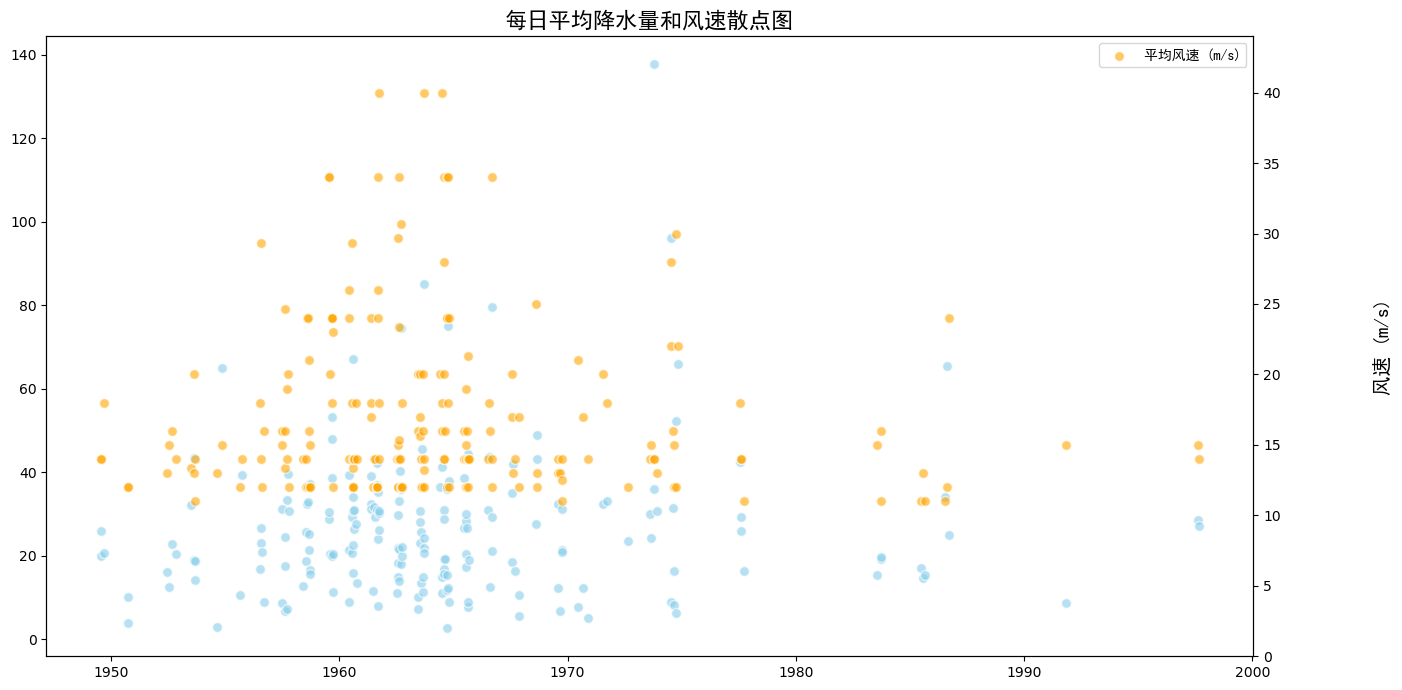

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体（确保你系统中已安装此字体）
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'  # 黑体字体路径
my_font = fm.FontProperties(fname=font_path)

# 读取降水量和风力信息文件，指定编码格式
precipitation_df = pd.read_csv(r"C:\Users\z\Desktop\降水量统计数据\1949-2018_DailyPrecipitation每日降雨量信息.csv", encoding='gbk')
wind_df = pd.read_csv(r"C:\Users\z\Desktop\降水量统计数据\1949-2018_风力信息.csv", encoding='gbk')

# 清理和处理降水量数据的时间列
precipitation_df['时间'] = pd.to_datetime(precipitation_df['时间'], errors='coerce')
wind_df['时间'] = pd.to_datetime(wind_df['时间'], errors='coerce')

# 删除空值
precipitation_df.dropna(subset=['时间', '每日降雨量'], inplace=True)
wind_df.dropna(subset=['时间', '风速'], inplace=True)

# 计算每天的平均降水量和风速
daily_precipitation = precipitation_df.groupby('时间')['每日降雨量'].mean().reset_index()
daily_wind = wind_df.groupby('时间')['风速'].mean().reset_index()

# 合并数据框
merged_df = pd.merge(daily_precipitation, daily_wind, on='时间', how='inner')

# 绘制图形
plt.figure(figsize=(14, 7))

# 绘制平均降水量的散点图
plt.scatter(merged_df['时间'], merged_df['每日降雨量'], 
            color='skyblue', alpha=0.6, edgecolors='w', s=50, label='平均降水量 (mm)')

# 创建第二个 y 轴用于风速
ax2 = plt.gca().twinx()
ax2.scatter(merged_df['时间'], merged_df['风速'], 
            color='orange', alpha=0.6, edgecolors='w', s=50, label='平均风速 (m/s)')

# 设置 y 轴范围
plt.ylim(0, merged_df['每日降雨量'].max() * 1.1)  # 调整降水量 y 轴范围
ax2.set_ylim(0, merged_df['风速'].max() * 1.1)  # 调整风速 y 轴范围

# 添加图例、标题和标签
plt.title('每日平均降水量和风速散点图', fontproperties=my_font, fontsize=16)
plt.xlabel('时间', fontproperties=my_font, fontsize=14)
plt.ylabel('降水量 (mm)', fontproperties=my_font, fontsize=14)
ax2.set_ylabel('风速 (m/s)', fontproperties=my_font, fontsize=14)  # 设置第二个 y 轴的标签

# 添加左侧 Y 轴标签
plt.gca().yaxis.set_label_coords(-0.1, 0.5)  # 调整标签位置
ax2.yaxis.set_label_coords(1.1, 0.5)  # 调整第二个 Y 轴标签位置

# 手动添加图例
plt.legend(loc='upper left', prop=my_font)
ax2.legend(loc='upper right', prop=my_font)

plt.xticks(rotation=45, fontproperties=my_font)  # 旋转日期标签
plt.tight_layout()  # 调整布局以避免标签重叠

# 保存图形
plt.savefig("每日平均降水量和风速散点图.png", dpi=600)  # 保存路径和文件名
plt.show()


MSE: 40.16
RMSE: 6.34
MAE: 4.80
R²: 0.01


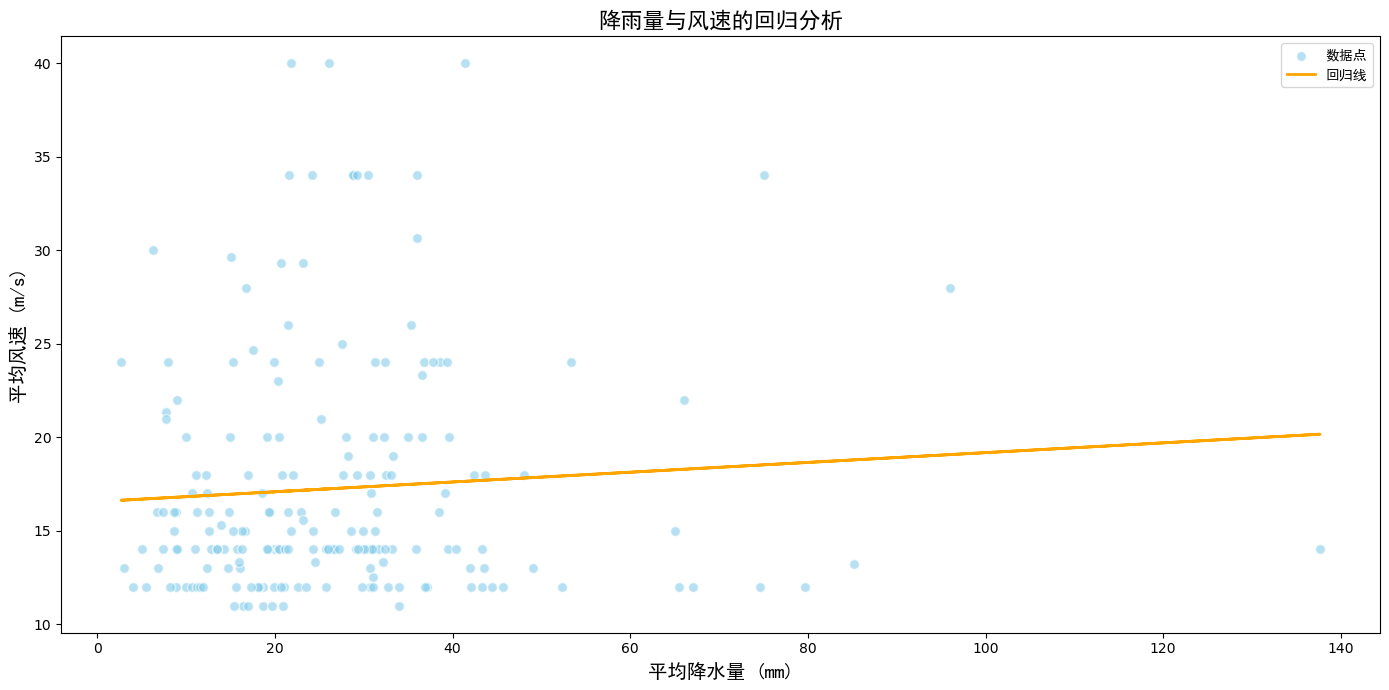

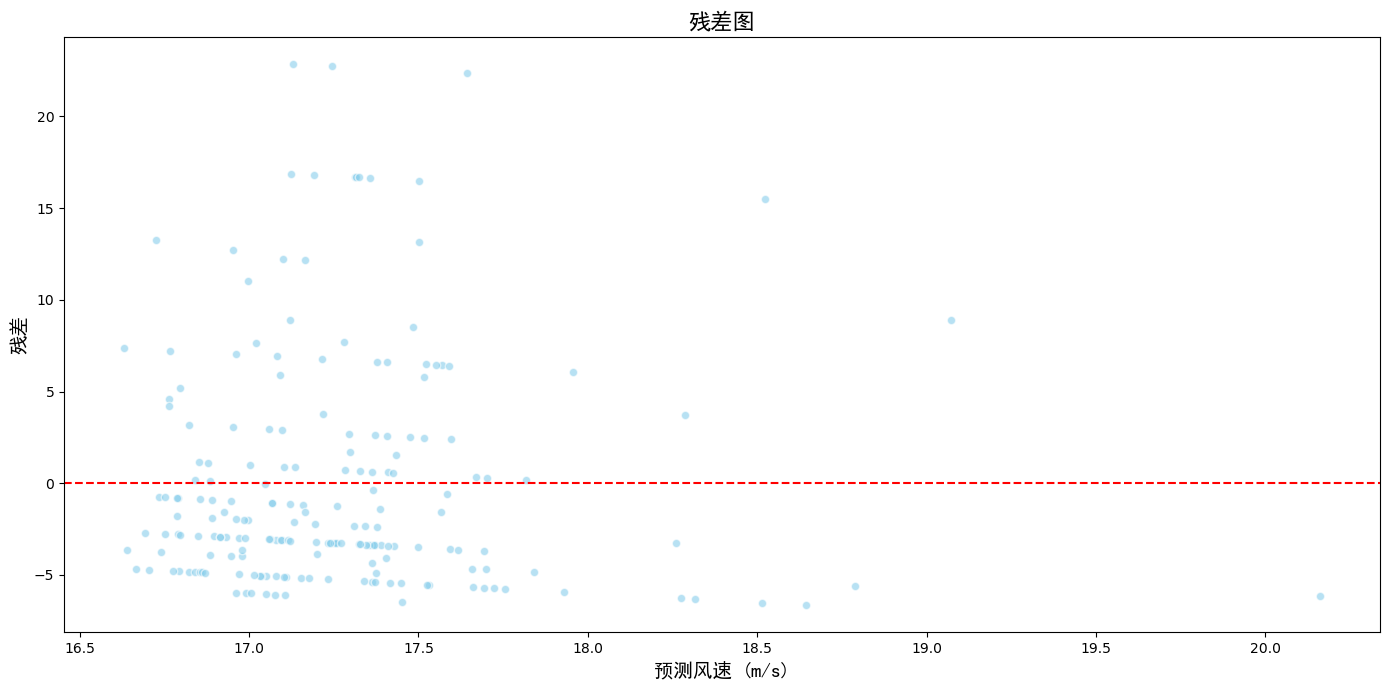

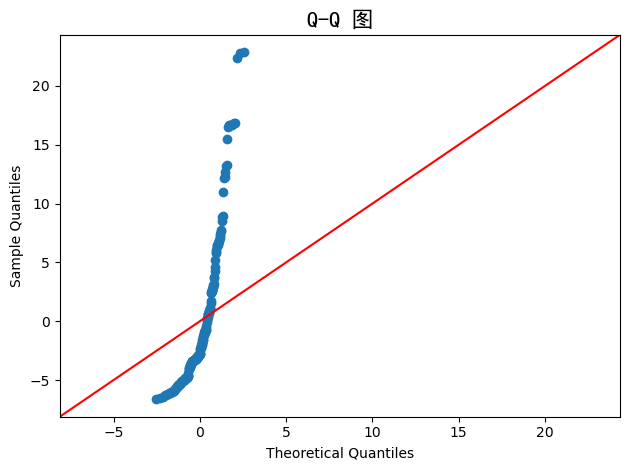

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import statsmodels.api as sm

# 设置中文字体
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'  # 黑体字体路径
my_font = fm.FontProperties(fname=font_path)

# 读取数据
precipitation_df = pd.read_csv(r"C:\Users\z\Desktop\降水量统计数据\1949-2018_DailyPrecipitation每日降雨量信息.csv", encoding='gbk')
wind_df = pd.read_csv(r"C:\Users\z\Desktop\降水量统计数据\1949-2018_风力信息.csv", encoding='gbk')

# 清理和处理时间列
precipitation_df['时间'] = pd.to_datetime(precipitation_df['时间'], errors='coerce')
wind_df['时间'] = pd.to_datetime(wind_df['时间'], errors='coerce')

# 删除空值
precipitation_df.dropna(subset=['时间', '每日降雨量'], inplace=True)
wind_df.dropna(subset=['时间', '风速'], inplace=True)

# 计算平均值
daily_precipitation = precipitation_df.groupby('时间')['每日降雨量'].mean().reset_index()
daily_wind = wind_df.groupby('时间')['风速'].mean().reset_index()

# 合并数据框
merged_df = pd.merge(daily_precipitation, daily_wind, on='时间', how='inner')

# 回归分析
X = merged_df[['每日降雨量']]
y = merged_df['风速']

# 创建线性回归模型
model = LinearRegression()
model.fit(X, y)

# 进行预测
predicted_wind_speed = model.predict(X)

# 计算评估指标
mse = mean_squared_error(y, predicted_wind_speed)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, predicted_wind_speed)
r2 = r2_score(y, predicted_wind_speed)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# 可视化
plt.figure(figsize=(14, 7))

# 散点图和回归线
plt.scatter(merged_df['每日降雨量'], merged_df['风速'], 
            color='skyblue', alpha=0.6, edgecolors='w', s=50, label='数据点')
plt.plot(merged_df['每日降雨量'], predicted_wind_speed, color='orange', linewidth=2, label='回归线')

# 添加标题和标签
plt.title('降雨量与风速的回归分析', fontproperties=my_font, fontsize=16)
plt.xlabel('平均降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('平均风速 (m/s)', fontproperties=my_font, fontsize=14)
plt.legend(prop=my_font)
plt.tight_layout()
plt.savefig("降雨量与风速的回归分析.png", dpi=600)
plt.show()

# 残差图
residuals = y - predicted_wind_speed
plt.figure(figsize=(14, 7))
plt.scatter(predicted_wind_speed, residuals, color='skyblue', alpha=0.6, edgecolors='w')
plt.axhline(0, color='red', linestyle='--')
plt.title('残差图', fontproperties=my_font, fontsize=16)
plt.xlabel('预测风速 (m/s)', fontproperties=my_font, fontsize=14)
plt.ylabel('残差', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig("降雨量与风速的残差图.png", dpi=600)
plt.show()

# Q-Q 图
sm.qqplot(residuals, line='45')
plt.title('Q-Q 图', fontproperties=my_font, fontsize=16)
plt.tight_layout()
plt.savefig("降雨量与风速的Q-Q 图.png", dpi=600)
plt.show()


MSE: 656.49
RMSE: 25.62
MAE: 15.07
R²: -0.13


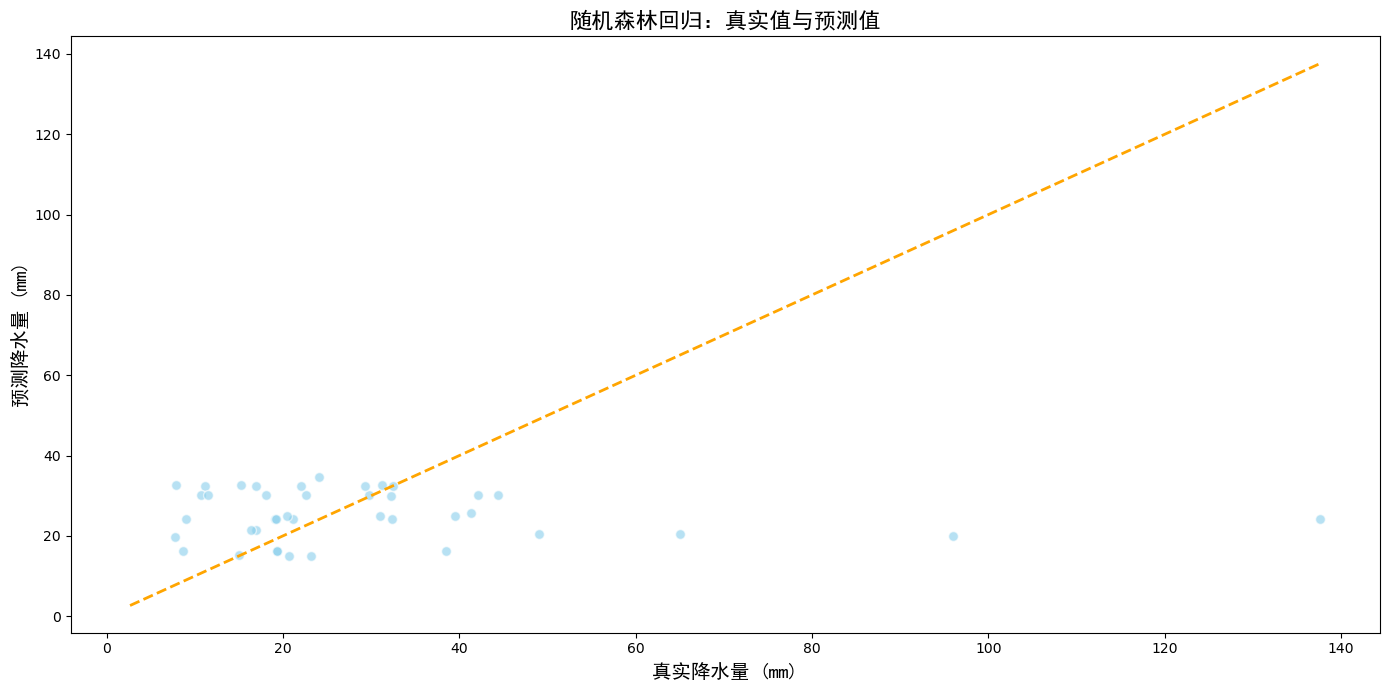

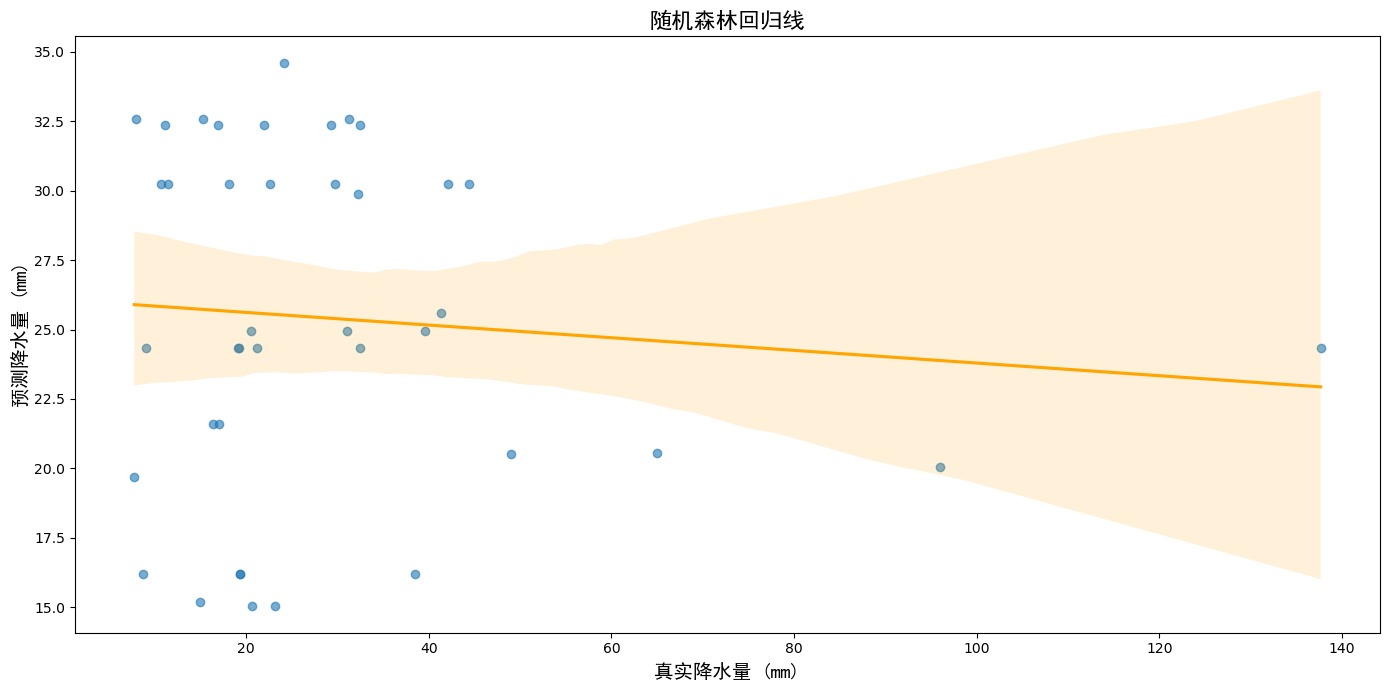

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# 设置中文字体
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'  # 黑体字体路径
my_font = fm.FontProperties(fname=font_path)

# 读取数据
precipitation_df = pd.read_csv(r"C:\Users\z\Desktop\降水量统计数据\1949-2018_DailyPrecipitation每日降雨量信息.csv", encoding='gbk')
wind_df = pd.read_csv(r"C:\Users\z\Desktop\降水量统计数据\1949-2018_风力信息.csv", encoding='gbk')

# 数据处理
precipitation_df['时间'] = pd.to_datetime(precipitation_df['时间'], errors='coerce')
wind_df['时间'] = pd.to_datetime(wind_df['时间'], errors='coerce')
precipitation_df.dropna(subset=['时间', '每日降雨量'], inplace=True)
wind_df.dropna(subset=['时间', '风速'], inplace=True)

daily_precipitation = precipitation_df.groupby('时间')['每日降雨量'].mean().reset_index()
daily_wind = wind_df.groupby('时间')['风速'].mean().reset_index()
merged_df = pd.merge(daily_precipitation, daily_wind, on='时间', how='inner')

# 特征选择
X = merged_df[['风速']]
y = merged_df['每日降雨量']

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# 1. 散点图
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6, edgecolors='w', s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', lw=2, linestyle='--')  # 理想预测线
plt.title('随机森林回归：真实值与预测值', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('真实值与预测值散点图.png', dpi=500)
plt.show()
# 4. 回归线（拟合曲线）
plt.figure(figsize=(14, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('随机森林回归线', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('随机森林回归线.png', dpi=500)
plt.show()


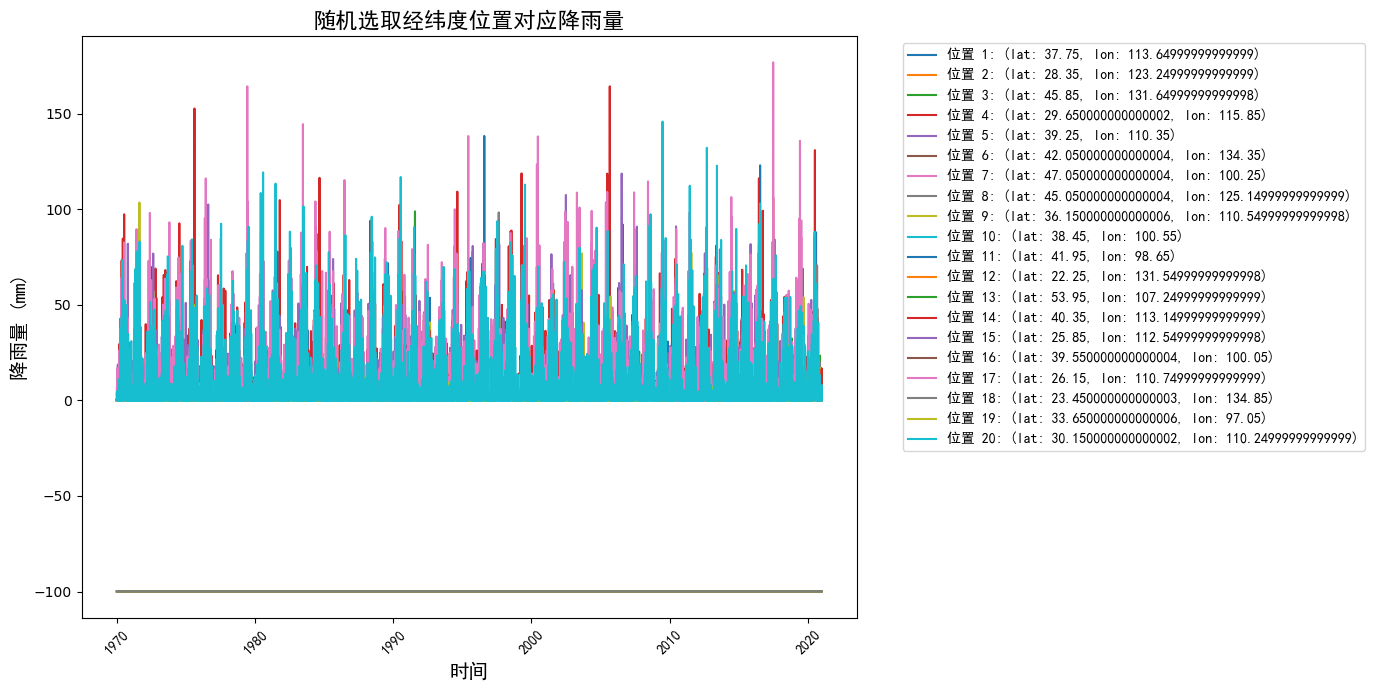

In [55]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置中文字体
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'
my_font = fm.FontProperties(fname=font_path)

# 读取 NetCDF 数据集
file_path = "C:\\Users\\z\\Desktop\\CHM_PRE_0.1dg_19612022\\CHM_PRE_0.1dg_19612022.nc"
dataset = xr.open_dataset(file_path)

# 检查数据集结构
dataset

# 选择时间范围为 1970 到 2020 年的数据
selected_data = dataset['pre'].sel(time=slice('1970-01-01', '2020-12-31'))

# 筛选有效的经纬度
valid_latitudes = dataset['latitude'].where((dataset['latitude'] >= 2) & (dataset['latitude'] <= 58), drop=True)
valid_longitudes = dataset['longitude'].where((dataset['longitude'] >= 95) & (dataset['longitude'] <= 180), drop=True)

# 随机选择有效经纬度位置
random_latitudes = np.random.choice(valid_latitudes, size=20, replace=False)
random_longitudes = np.random.choice(valid_longitudes, size=20, replace=False)

# 提取对应经纬度的降雨量数据
rainfall_data = selected_data.sel(latitude=random_latitudes, longitude=random_longitudes, method='nearest')

# 将降雨量中的 -100 替换为 NaN，以便在图表中忽略这些无效值
rainfall_data = rainfall_data.where(rainfall_data != --99.9000015258789, np.nan)

# 可视化降雨量
plt.figure(figsize=(14, 7))

# 遍历随机选择的位置
for i in range(20):
    plt.plot(rainfall_data['time'], rainfall_data.sel(latitude=random_latitudes[i], longitude=random_longitudes[i]), 
             label=f'位置 {i + 1}: (lat: {random_latitudes[i]}, lon: {random_longitudes[i]})')

plt.title('随机选取经纬度位置对应降雨量', fontproperties=my_font, fontsize=16)
plt.xlabel('时间', fontproperties=my_font, fontsize=14)
plt.ylabel('降雨量 (mm)', fontproperties=my_font, fontsize=14)
plt.xticks(rotation=45, fontproperties=my_font)
plt.legend(prop=my_font, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 显示图形
plt.savefig('随机选取经纬度位置对应降雨量',dpi=600)
plt.show()

# 关闭数据集
dataset.close()


In [72]:
import pandas as pd
import numpy as np
import xarray as xr
from geopy.distance import geodesic

# 读取台风数据
df = df[(df['当前台风时间'].dt.year >= 1970) & (df['当前台风时间'].dt.year <= 2020)]

# 加载降雨量数据
nc_file = r"C:\Users\z\Desktop\CHM_PRE_0.1dg_19612022\CHM_PRE_0.1dg_19612022.nc"
dataset = xr.open_dataset(nc_file)

# 定义采样点个数
num_samples = 20

# 存储结果
results = []

# 遍历台风数据中的每一行
for _, row in df.iterrows():
    typhoon_lat = row['纬度']
    typhoon_lon = row['经度']
    typhoon_time = row['当前台风时间']
    
    # 从降雨量数据中获取对应时间的数据
    precip_data = dataset['pre'].sel(time=typhoon_time, method='nearest')
    
    # 生成随机采样点
    sample_points = []
    for _ in range(num_samples):
        # 在一定的范围内生成随机的经纬度采样点
        sample_lat = typhoon_lat + np.random.uniform(-0.5, 0.5)  # 0.5度范围内随机采样
        sample_lon = typhoon_lon + np.random.uniform(-0.5, 0.5)
        
        # 获取该采样点的降雨量
        try:
            precip_value = precip_data.sel(latitude=sample_lat, longitude=sample_lon, method='nearest').values
        except KeyError:
            precip_value = np.nan  # 若未找到降雨数据，则设为空值
            
        # 计算采样点与台风位置的距离
        distance = geodesic((typhoon_lat, typhoon_lon), (sample_lat, sample_lon)).kilometers
        
        # 记录每个采样点的信息
        sample_points.append({
            '台风时间': typhoon_time,
            '台风纬度': typhoon_lat,
            '台风经度': typhoon_lon,
            '采样点纬度': sample_lat,
            '采样点经度': sample_lon,
            '采样点降雨量': precip_value,
            '距离': distance
        })
    
    # 添加当前台风的采样结果到总结果中
    results.extend(sample_points)

# 转为DataFrame方便查看和输出
result_df = pd.DataFrame(results)

# 保存结果到CSV文件
output_file = r"C:\Users\z\Desktop\台风降雨量采样结果.csv"
result_df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"结果已保存到 {output_file}")


结果已保存到 C:\Users\z\Desktop\台风降雨量采样结果.csv


In [14]:
import pandas as pd

# 读取采样结果数据
input_file = r"C:\Users\z\Desktop\台风降雨量采样结果.csv"
result_df = pd.read_csv(input_file, encoding='gbk')

# 剔除降雨量为0和-99.9的数据
cleaned_df = result_df[(result_df['采样点降雨量'] != 0) & (result_df['采样点降雨量'] != -99.9)]

# 保存清理后的结果
output_cleaned_file = r"C:\Users\z\Desktop\台风降雨量采样结果_cleaned.csv"
cleaned_df.to_csv(output_cleaned_file, index=False, encoding='utf-8-sig')

print(f"清理后的结果已保存到 {output_cleaned_file}")


清理后的结果已保存到 C:\Users\z\Desktop\台风降雨量采样结果_cleaned.csv


MSE: 2629.61
RMSE: 51.28
MAE: 38.37
R²: -0.49


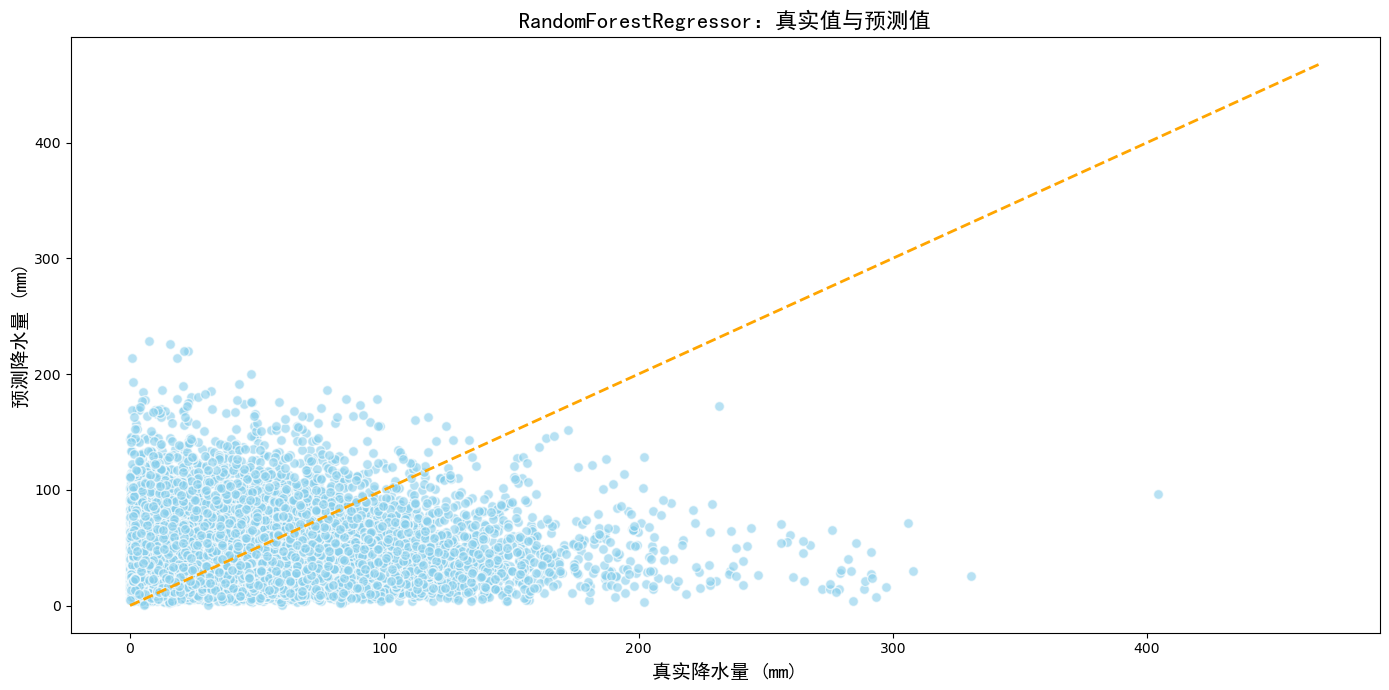

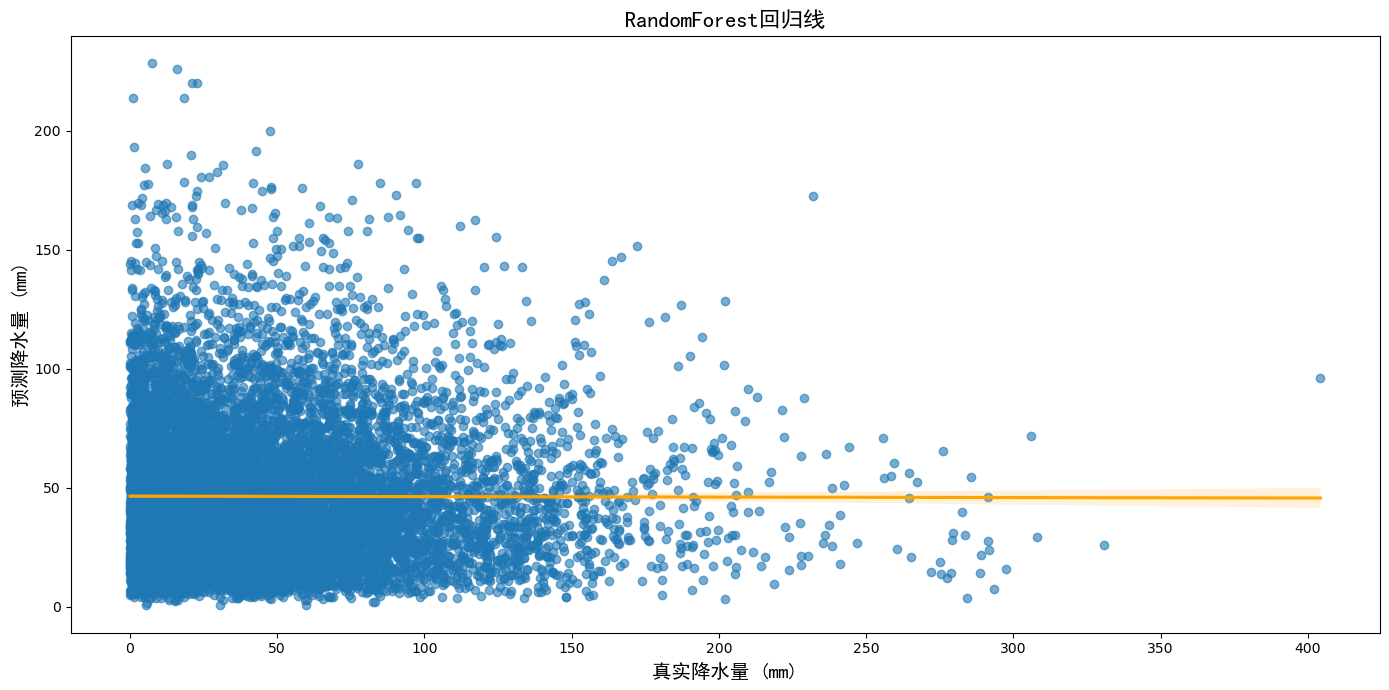

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# 设置中文字体
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'  # 黑体字体路径
my_font = fm.FontProperties(fname=font_path)
# 特征选择
X = cleaned_df[['距离']]
y = cleaned_df['采样点降雨量']

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# 1. 散点图
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6, edgecolors='w', s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', lw=2, linestyle='--')  # 理想预测线
plt.title('RandomForestRegressor：真实值与预测值', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('RandomForestRegressor真实值与预测值散点图.png', dpi=500)
plt.show()
# 4. 回归线（拟合曲线）
plt.figure(figsize=(14, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('RandomForest回归线', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('RF回归线.png', dpi=500)
plt.show()


In [16]:
import pandas as pd
import numpy as np

# 读取贝碧嘉数据
file_path = r"C:\Users\z\Downloads\贝碧嘉数据.xlsx"
data = pd.read_excel(file_path)

# 假设经度和纬度列名分别为 'longitude' 和 'latitude'
longitude = data['经度']
latitude = data['纬度']

# 计算路径的中心点
center_longitude = np.mean(longitude)
center_latitude = np.mean(latitude)
center_point = (center_longitude, center_latitude)

# 计算中心点到每个点的距离（使用 Haversine 公式）
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # 地球半径，单位为公里
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# 计算中心点到其他点的距离
distances = []
for i in range(len(data)):
    distance = haversine(center_latitude, center_longitude, latitude[i], longitude[i])
    distances.append(distance)

# 将结果添加到数据中
data['distance_to_center'] = distances

# 输出中心点和距离信息
print(f"中心点位置: 经度={center_longitude}, 纬度={center_latitude}")
print(data[['纬度', '经度', 'distance_to_center']])

中心点位置: 经度=129.70833333333334, 纬度=25.195833333333336
      纬度     经度  distance_to_center
0   10.8  146.8         2409.237106
1   11.2  146.2         2331.234241
2   11.6  145.7         2261.147512
3   12.1  145.5         2206.940639
4   12.6  145.4         2161.032446
..   ...    ...                 ...
67  33.5  115.0         1695.673025
68  33.5  114.8         1711.903106
69  33.4  114.8         1706.585133
70  33.2  114.9         1687.888316
71  32.7  114.9         1662.524890

[72 rows x 3 columns]


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

# 设置中文字体
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'  # 黑体字体路径
my_font = fm.FontProperties(fname=font_path)

# 1. 读取降水量数据，指定编码
rainfall_data = pd.read_csv(r"C:\Users\z\Desktop\台风降雨量采样结果_cleaned.csv", encoding='gbk')  # 或者使用 'ISO-8859-1'

# 2. 假设 '距离' 和 '采样点降雨量' 是降水量数据中的列
# 先确保你的降水量数据与贝碧嘉路径数据相对应
# 将距离添加到降水量数据
rainfall_data['距离'] = distances  # distances 是之前计算的距离列表

# 特征选择
X = rainfall_data[['距离']]
y = rainfall_data['采样点降雨量']

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# 1. 散点图
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6, edgecolors='w', s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', lw=2, linestyle='--')  # 理想预测线
plt.title('RandomForestRegressor：真实值与预测值', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('RandomForestRegressor真实值与预测值散点图.png', dpi=500)
plt.show()

# 4. 回归线（拟合曲线）
plt.figure(figsize=(14, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('RandomForest回归线', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('RF回归线.png', dpi=500)
plt.show()


ValueError: Length of values (72) does not match length of index (60303)

MSE: 2629.61
RMSE: 51.28
MAE: 38.37
R²: -0.49


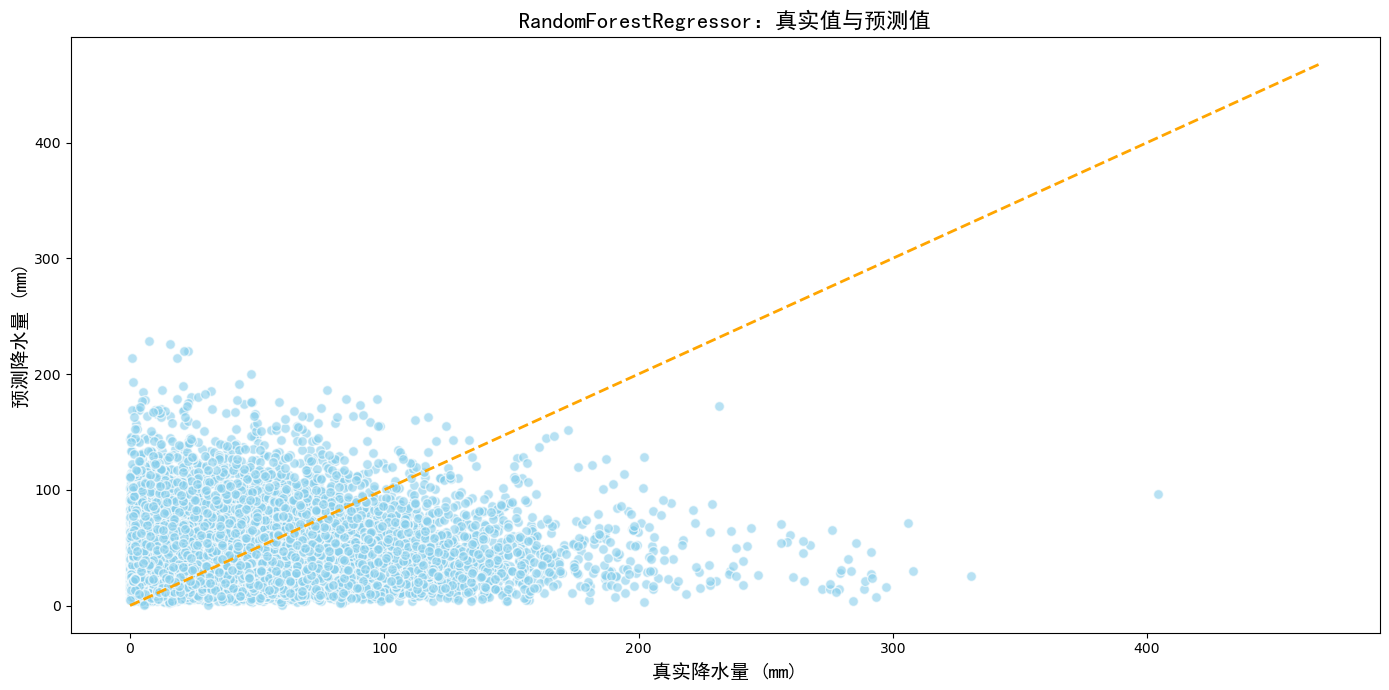

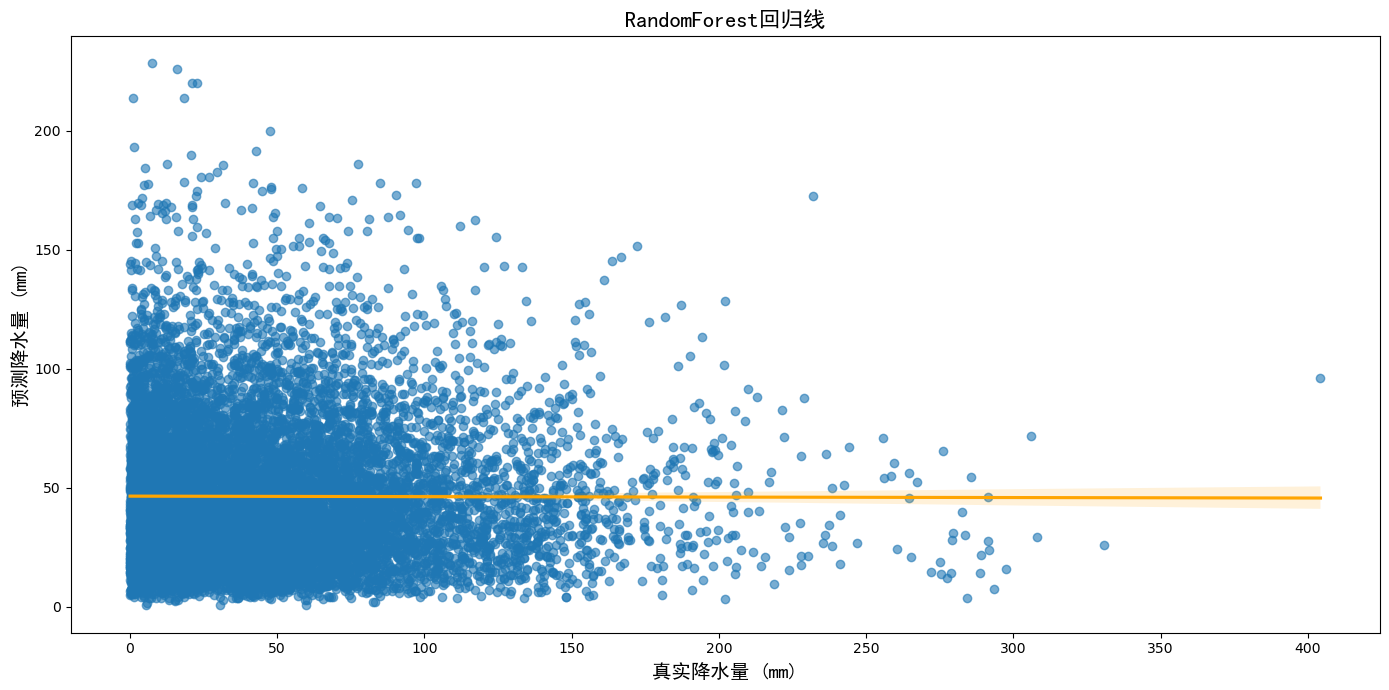

NameError: name 'RandomForestClassifier' is not defined

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 设置中文字体
font_path = 'C:\\Windows\\Fonts\\simhei.ttf'  # 黑体字体路径
my_font = fm.FontProperties(fname=font_path)

# 1. 读取降水量数据
cleaned_df = pd.read_csv(r"C:\Users\z\Desktop\台风降雨量采样结果_cleaned.csv", encoding='gbk')  # 或者使用 'ISO-8859-1'

# 2. 特征选择
X = cleaned_df[['距离']]
y = cleaned_df['采样点降雨量']

# 3. 数据分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 5. 训练模型
model.fit(X_train, y_train)

# 6. 预测
y_pred = model.predict(X_test)

# 7. 评估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R²: {r2:.2f}')

# 8. 散点图
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred, color='skyblue', alpha=0.6, edgecolors='w', s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='orange', lw=2, linestyle='--')  # 理想预测线
plt.title('RandomForestRegressor：真实值与预测值', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('RandomForestRegressor真实值与预测值散点图.png', dpi=500)
plt.show()

# 9. 回归线（拟合曲线）
plt.figure(figsize=(14, 7))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.6}, line_kws={'color':'orange'})
plt.title('RandomForest回归线', fontproperties=my_font, fontsize=16)
plt.xlabel('真实降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.ylabel('预测降水量 (mm)', fontproperties=my_font, fontsize=14)
plt.tight_layout()
plt.savefig('RF回归线.png', dpi=500)
plt.show()

# 设置模型和参数网格
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
}

# 执行 GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

print("最佳参数:", grid_search.best_params_)


In [21]:
import pandas as pd
import numpy as np

# 1. 读取贝碧嘉的路径经纬度数据
file_path = "C:\\Users\\z\\Desktop\\Mathor\\RNN贝碧嘉预测.xlsx"  # 替换为实际文件路径
data = pd.read_excel(file_path)

# 假设数据中包含经度和纬度的列
lon = data['经度'].to_numpy()
lat = data['纬度'].to_numpy()

# 2. 计算路径中心点（简单平均）
center_lon = np.mean(lon)
center_lat = np.mean(lat)
center_point = (center_lat, center_lon)

print(f"中心点坐标：纬度 {center_lat:.4f}, 经度 {center_lon:.4f}")

# 3. 抽取十个采样点
# 假设我们在路径上均匀抽样10个点
sampling_indices = np.linspace(0, len(lon) - 1, 10).astype(int)
sampling_points = [(lat[i], lon[i]) for i in sampling_indices]

# 4. 定义Haversine公式
def haversine(coord1, coord2):
    R = 6371.0  # 地球半径，单位：千米
    lat1, lon1 = coord1
    lat2, lon2 = coord2

    # 将经纬度转换为弧度
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

# 5. 计算每个采样点到中心点的距离
distances = [haversine(center_point, point) for point in sampling_points]

# 输出采样点及其与中心点的距离
for i, point in enumerate(sampling_points):
    print(f"采样点 {i+1}: 纬度 {point[0]:.4f}, 经度 {point[1]:.4f}, 距离中心点 {distances[i]:.2f} km")


中心点坐标：纬度 25.1958, 经度 129.7083
采样点 1: 纬度 10.8000, 经度 146.8000, 距离中心点 2409.24 km
采样点 2: 纬度 13.6000, 经度 143.8000, 距离中心点 1958.44 km
采样点 3: 纬度 16.6000, 经度 140.0000, 距离中心点 1432.86 km
采样点 4: 纬度 21.5000, 经度 137.2000, 距离中心点 867.98 km
采样点 5: 纬度 25.7000, 经度 132.0000, 距离中心点 236.82 km
采样点 6: 纬度 29.4000, 经度 127.7000, 距离中心点 507.83 km
采样点 7: 纬度 30.7000, 经度 122.5000, 距离中心点 935.45 km
采样点 8: 纬度 31.8000, 经度 119.1000, 距离中心点 1269.25 km
采样点 9: 纬度 33.1000, 经度 115.9000, 距离中心点 1600.97 km
采样点 10: 纬度 32.7000, 经度 114.9000, 距离中心点 1662.52 km
